# Introduction
This notebook is intended to show a very basic example of the Anderson localization in one-dimensional system. 

In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

To show the idea of Anderson localization, we can consider a finite atomic ring:
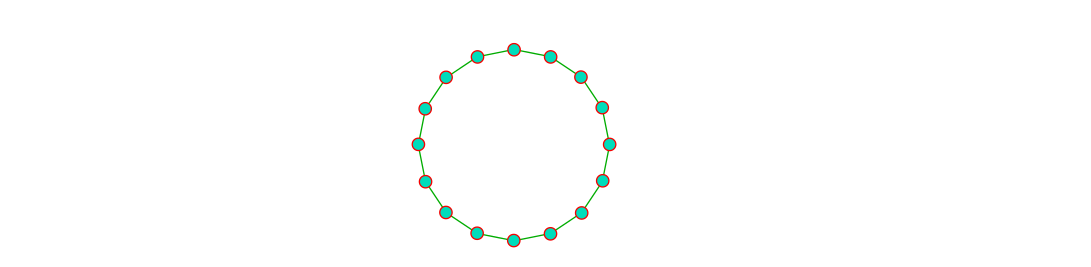  
Generally, with N atoms.
The Hamiltonian with nearest-neighbour hopping $t$ writes:$$\left[\begin{array}{ccllcc}
0 & t\\
t & 0 & t\\
 & t & 0 & t\\
 &  & t & \text{……}\\
 &  &  &  & 0 & t\\
 &  &  &  & t & 0
\end{array}\right]$$

The disorder is introduced as random on-site potentionals ${d_i}$. The Hamiltonian then becomes:
$$\left[\begin{array}{ccllcc}
d_{1} & t\\
t & d_{2} & t\\
 & t & d_{3} & t\\
 &  & t & \text{……}\\
 &  &  &  & d_{N-1} & t\\
 &  &  &  & t & d_{N}
\end{array}\right]$$

The localization can be characterized by the eigenstates of the system. Quantitavely, one can use the inverse partipicapation ratio(IPR) to depict the localazation:
$$IPR_j=\frac{1}{\Sigma p_i ^2}=\frac{1}{\Sigma |\psi _i |^4}$$ for the $j$th eigenstate. Generally, smaller IPA corresponds to stronger localization. One can also calculate the average of IPR for all eigenstates, which shows localization of the whole system.

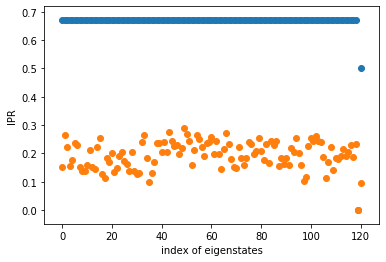

interactive(children=(IntSlider(value=60, description='n', max=120, min=1), Output()), _dom_classes=('widget-i…

<function __main__.show_eigvecs(n)>

In [12]:
def IPA(vector):
    vector=vector/np.sum(abs(vector)**2);
    v1=abs(vector)**2;
    v1=v1**2;
    ipr=1.0/np.sum(v1)
    return(ipr)
def buildham(t,nq):
    nq=nq-1
    y=np.ones(nq)

    mat1=np.diag(y,-1)*t+np.diag(y,1)*t
    mat1[nq,0]=t
    mat1[0,nq]=t 

    #mat=np.kron(part1,mat1)+np.kron(part2,mat2)
    #print(mat)
    return(mat1)
ndim=121
nr=np.arange(0,ndim,1)
H0=buildham(1,ndim)
disorder=np.random.rand(ndim)-0.5;
d1=disorder**2;
H1=H0+np.diag(disorder)
[eigval0,eigvec0]=np.linalg.eigh(H0)
[eigval1,eigvec1]=np.linalg.eigh(H1)
#plt.scatter(nr,eigvec0[2,:])
#plt.scatter(disorder,d1)
#print(ndim)
ipa1=np.zeros(ndim)
ipa0=np.zeros(ndim)
for i in range(0,ndim-1):
    ipa1[i-1]=IPA(eigvec1[i,:])/ndim
    ipa0[i-1]=IPA(eigvec0[i,:])/ndim
plt.xlabel('index of eigenstates')
plt.ylabel('IPR')
plt.scatter(nr,ipa0)
plt.scatter(nr,ipa1)
def show_eigvecs(n):
    plt.xlabel('index of atoms')
    plt.ylabel('density of wavefunction')
    plt.plot(abs(eigvec0[n,:])**2)
    plt.plot(abs(eigvec1[n,:])**2)
interact(show_eigvecs,n=(1,ndim-1))